In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [186]:
load_iris(as_frame = True)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [187]:
iris_data = load_iris(as_frame = True).data
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [188]:
iris_species = load_iris(as_frame = True).target
iris_species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [189]:
iris_target_names = load_iris(as_frame = True).target_names
iris_target_names   # 0 -> setosa , 1 -> versicolor , 2 -> virignica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [190]:
iris_species.value_counts() # all species are equally distributed

target
0    50
1    50
2    50
Name: count, dtype: int64

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_species,random_state = 42,test_size = 0.2)

In [192]:
y_test.value_counts()

target
2    11
0    10
1     9
Name: count, dtype: int64

In [193]:
DT_clf = DecisionTreeClassifier(max_depth = 3,random_state = 42)

In [194]:
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

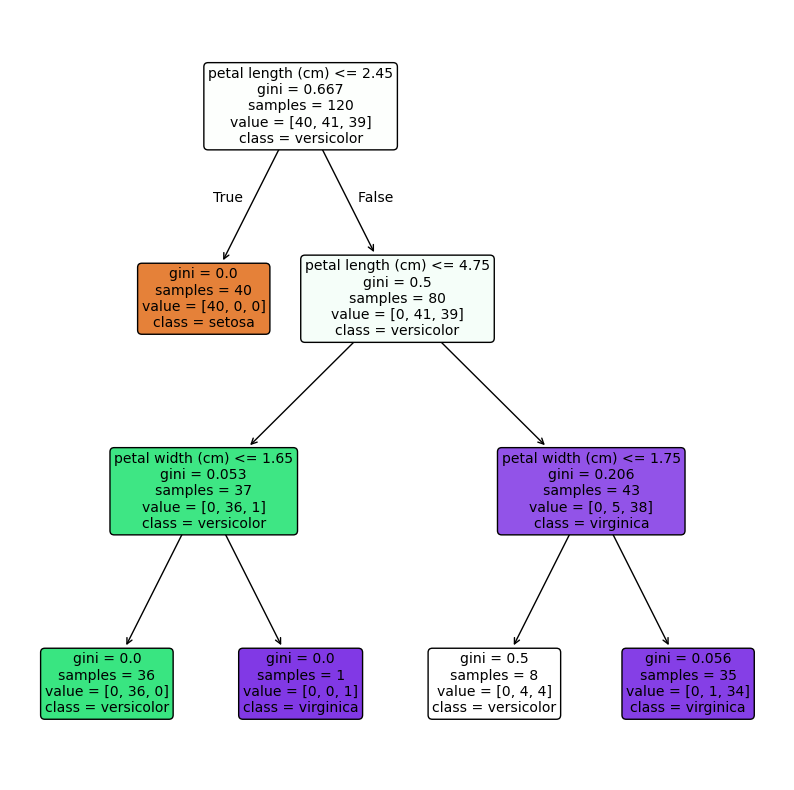

In [195]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10)) # Adjust figure size as needed
plot_tree(DT_clf,
          feature_names=load_iris(as_frame = True).feature_names,
          class_names=iris_target_names,
          filled=True,
          rounded=True)
plt.show()

In [196]:
from sklearn.model_selection import cross_val_score
cross_val_score(DT_clf,X_train,y_train,cv = 3,scoring = 'accuracy')

array([1.  , 0.9 , 0.95])

In [197]:
y_predicted = DT_clf.predict(X_test)
y_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

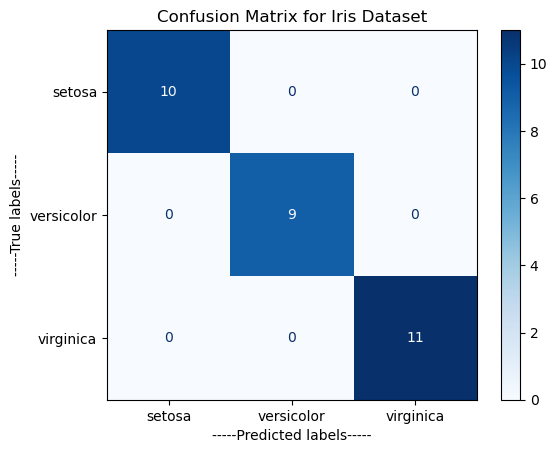

In [199]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_target_names)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Iris Dataset")
plt.xlabel('-----Predicted labels-----')
plt.ylabel('-----True labels-----')
plt.show() 
# our model is predicting all the samples correctly.The matrix indicates that 10 setosa samples,9 versicolor samples,11 viriginica samples are present in the test set.

In [200]:
DT_clf.score(X_test,y_test) * 100

100.0

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_predicted)
accuracy_score * 100

100.0

In [202]:
print(f"Accuracy of our model is {accuracy_score * 100}%")

Accuracy of our model is 100.0%
